<a href="https://colab.research.google.com/github/Sharaffin/EDA-GlobalTerrorismAnalysis/blob/main/Copy_of_bike_sharing_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# IMPORTING LIBRARIES 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/ALMABETTER/ML 1st proj/SeoulBikeData.csv"

In [ ]:
# READING DATASET
df = pd.read_csv(path, encoding= 'unicode_escape')

DATA CLEANING

In [ ]:

df.head(50)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe(include = "all")

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
# CHECKING NULL VALUES IN THE DATASET
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# RENAMING COLUMNS NAME
df.columns = ['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temperature',
       'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'functioning_day']

In [ ]:
# CHANGING DATE COLUMN TO DATETIME DTYPE
df["date"] = pd.to_datetime(df['date'].astype(str), format='%d/%m/%Y')

In [ ]:
# ADDING 3 NEW COLUMN AS DAY , MONTH , YEAR
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

In [ ]:
# REMOVING DATE COLUMN FROM THE DATASET
df = df.iloc[:,1:]

In [ ]:
df.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'day', 'month',
       'year'],
      dtype='object')

In [ ]:
# SLECTING ALL CATEGORICAL COLUMNS
df_cat = df.select_dtypes(include= 'object')

In [ ]:
# DEFINING FUNCTION FOR BAR PLOT OF COLUMNS
def plot_bar(nue):
  plt.figure(figsize=(8,5))
  sns.barplot(x = nue, y= 'rented_bike_count' , data = df, label="Some Label", palette= "husl")
  plt.show()

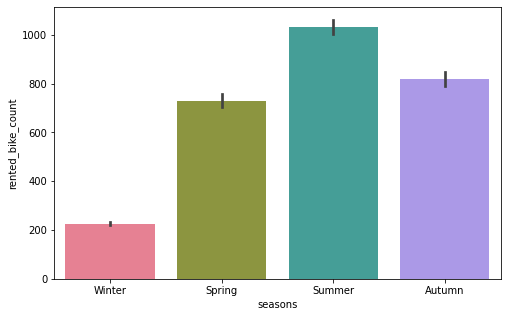

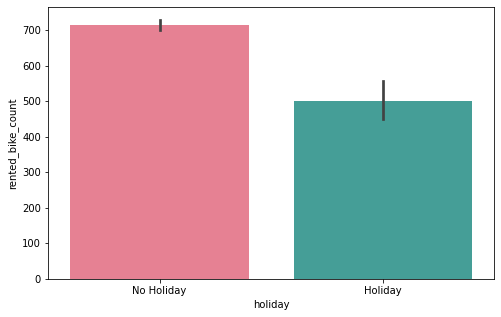

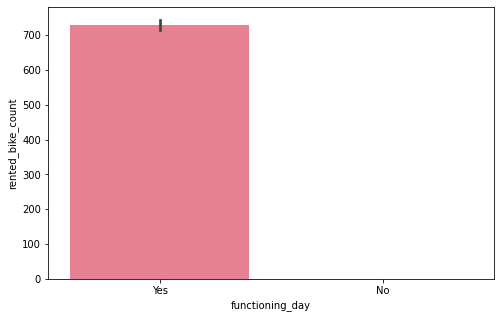

In [ ]:
# CATEGORICAL BAR PLOT TOWARDS RENTED BIKE COUNT(TRAGET VARIABLE)
for i in df_cat.columns:
  plot_bar(i)

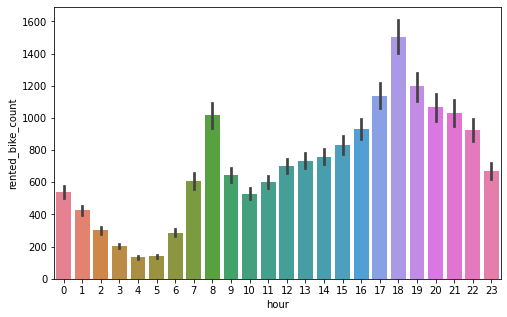

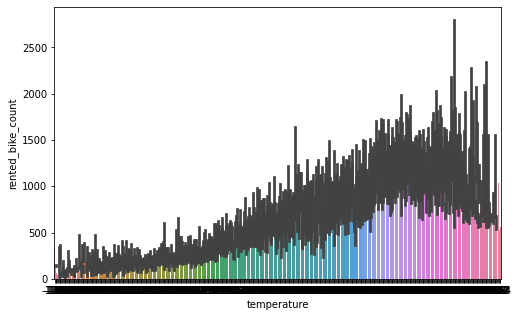

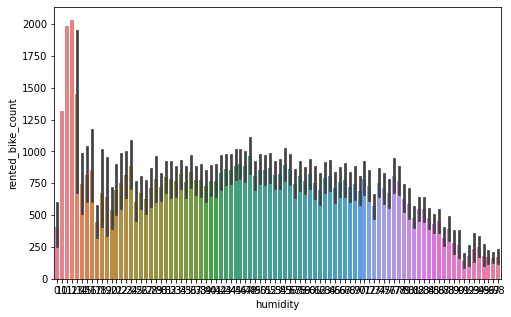

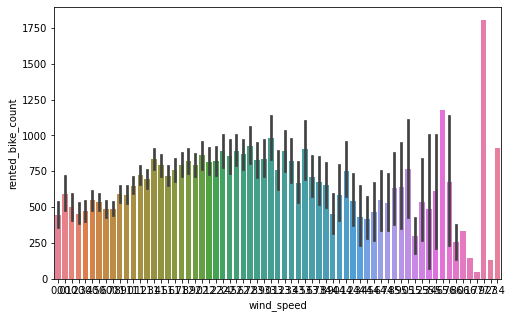

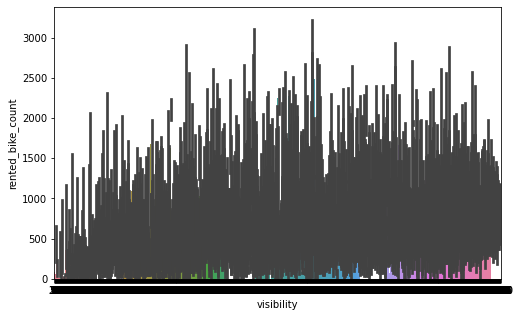

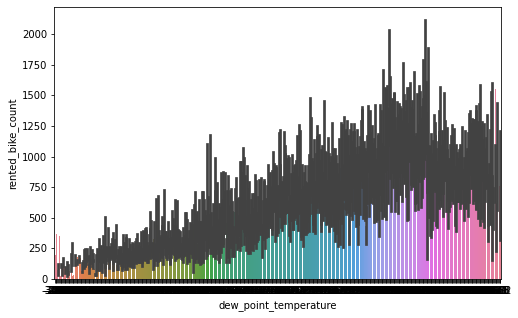

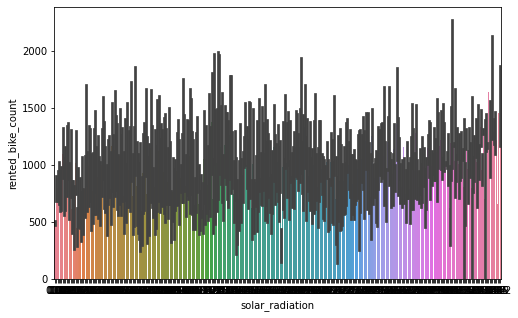

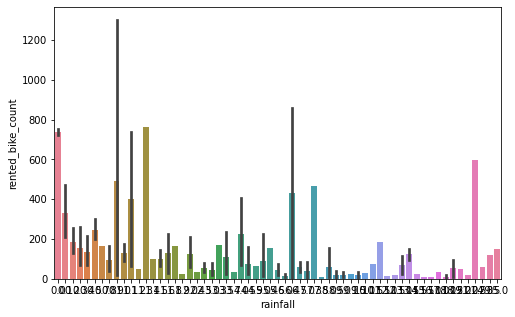

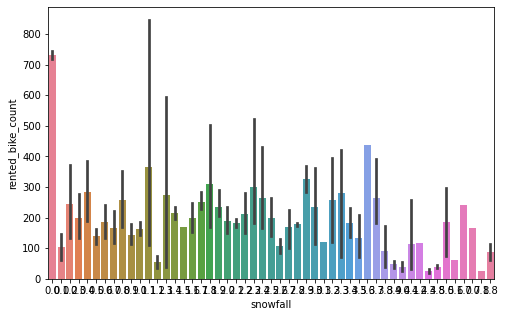

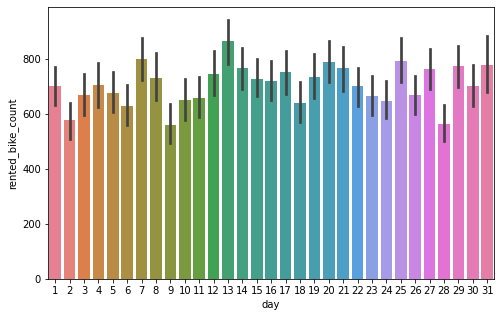

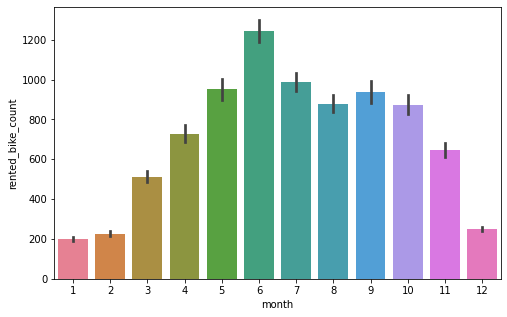

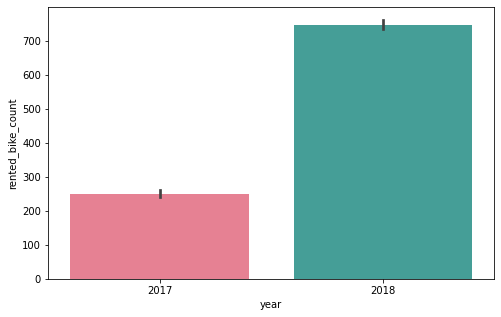

In [ ]:
# NUMERICAL COLUMNS BAR PLOT TOWARDS RENTED BIKE COUNT(TRAGET VARIABLE)
for i in df.describe().columns[1:]:
  plot_bar(i)

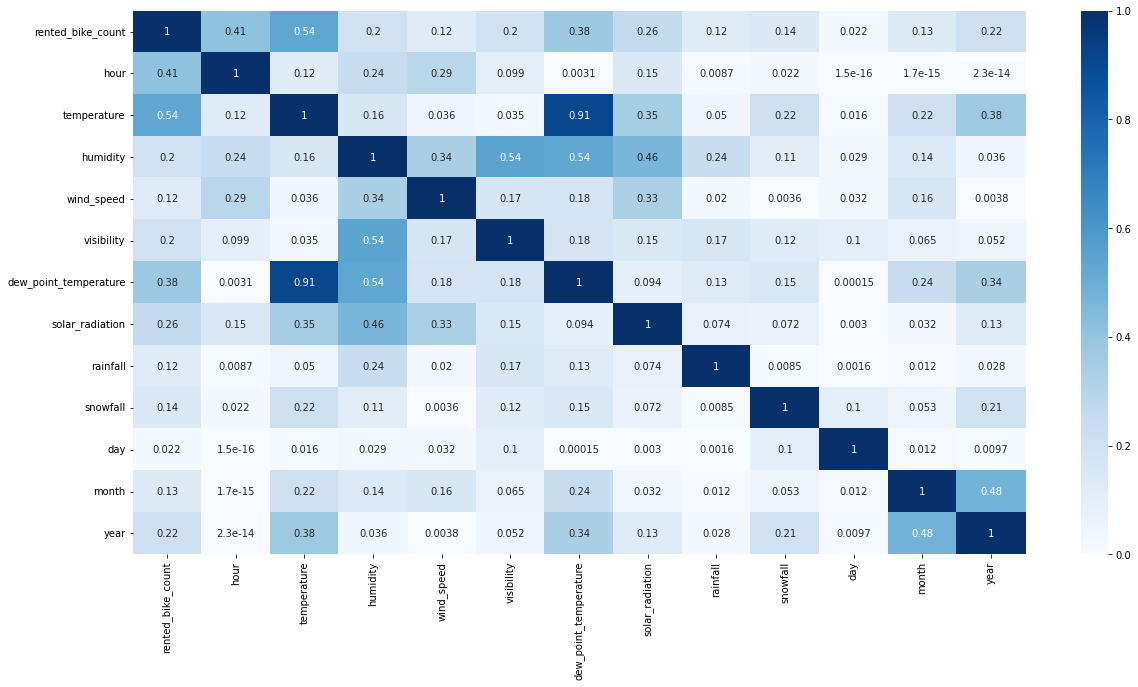

In [ ]:
# CORELATION HEATMAP TO FIND OUT THE HIGHER CORELATING VARIABLES
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,cmap='Blues')
plt.show()

In [ ]:
# DEFINING FUNTION TO PLOT CORELATION GRAPH OF EACH NUMERIC COLUMNS TOWARDS RENTED BIKE COUNT(TRAGET VARIABLE)
def correlation(abc):
  plt.figure(figsize = (11,5))
  sns.regplot(x=abc, y=df['rented_bike_count'],line_kws={"color": "black"})
  plt.show()

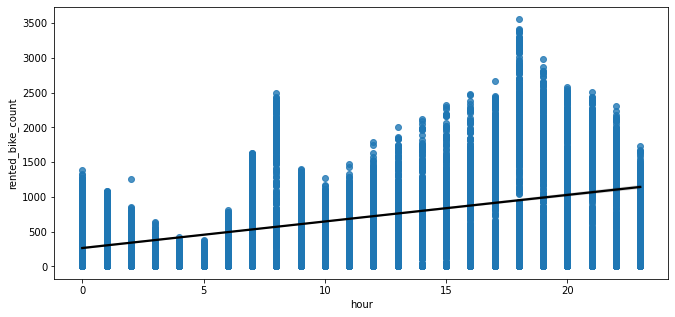

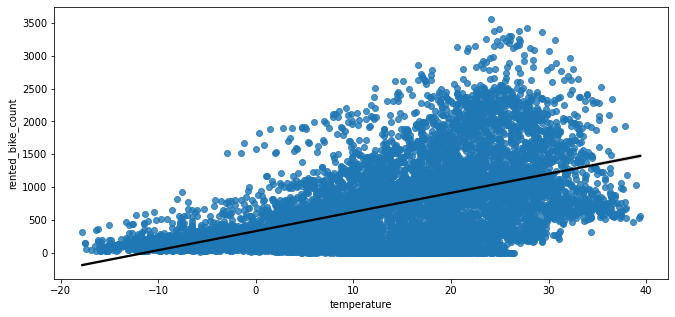

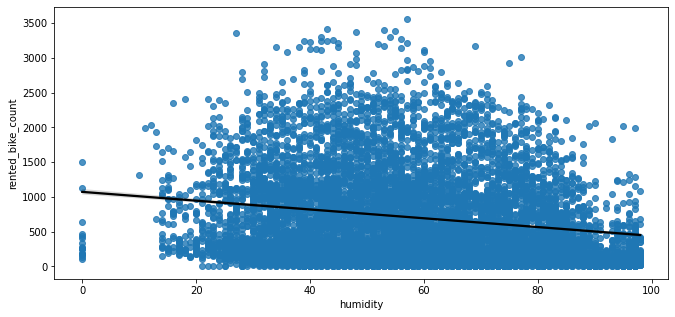

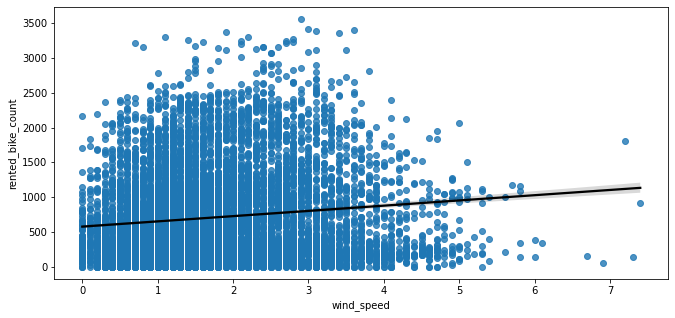

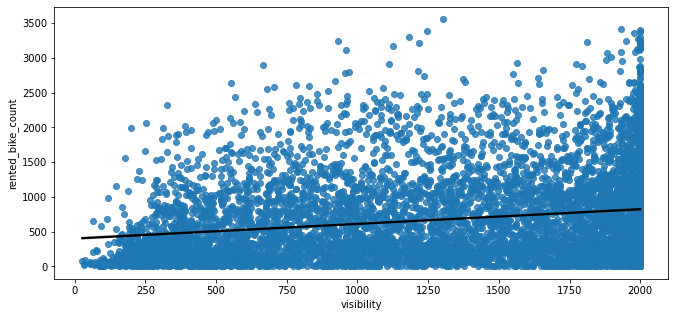

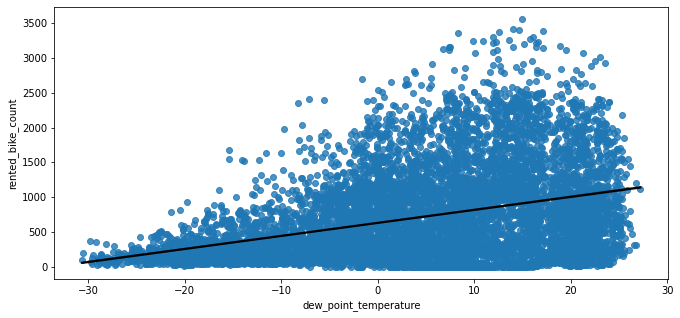

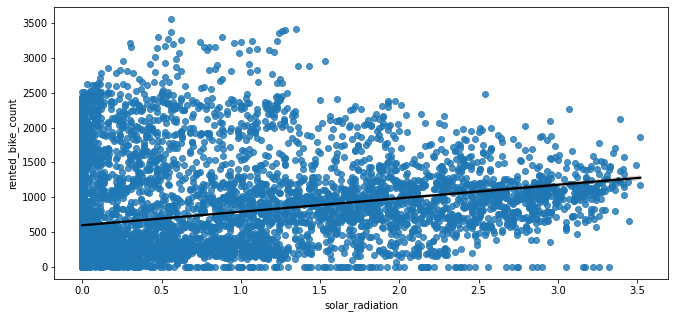

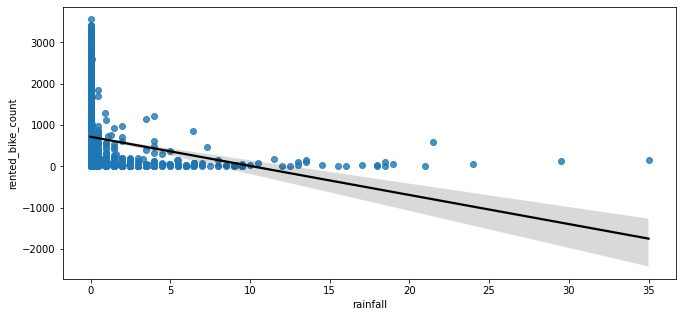

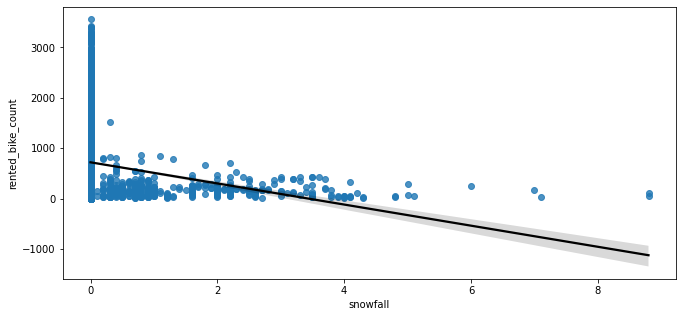

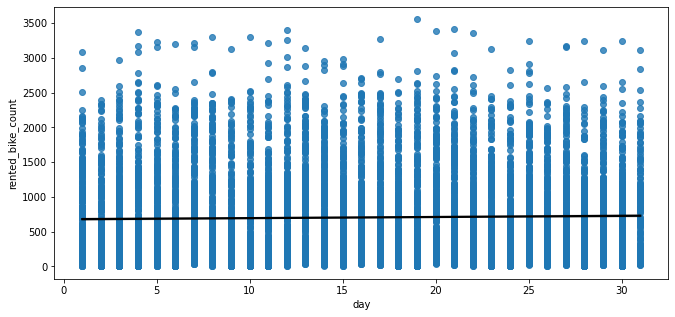

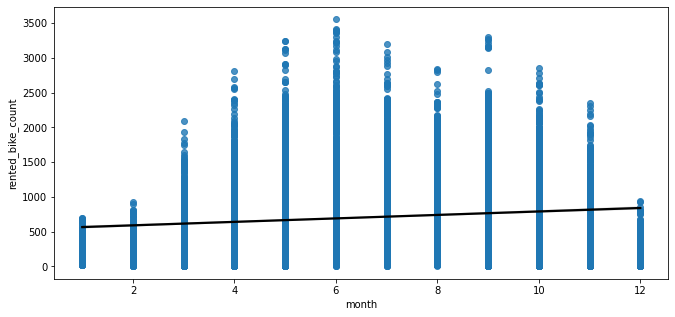

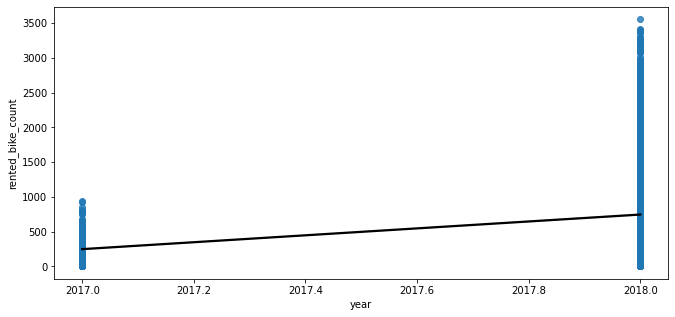

In [ ]:
for i in df.describe().columns[1:]:
  correlation(df[i])

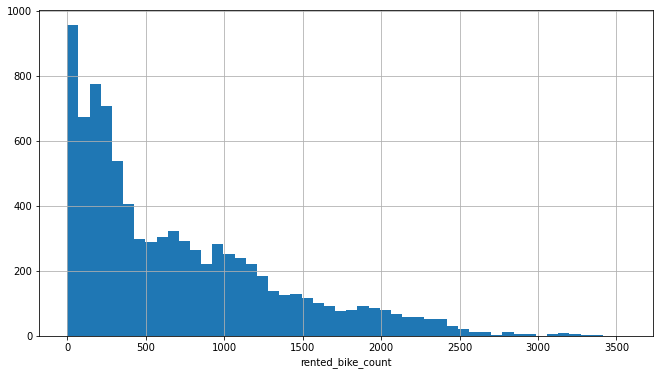

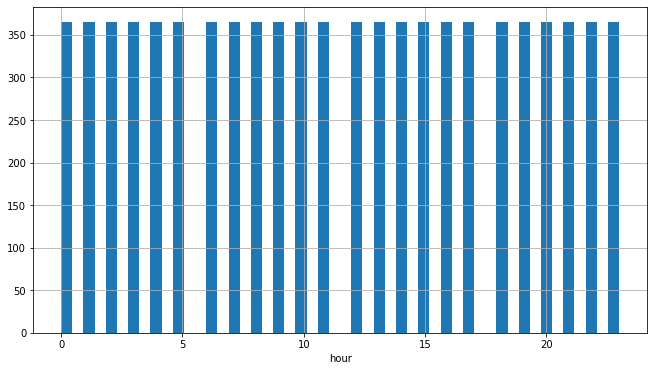

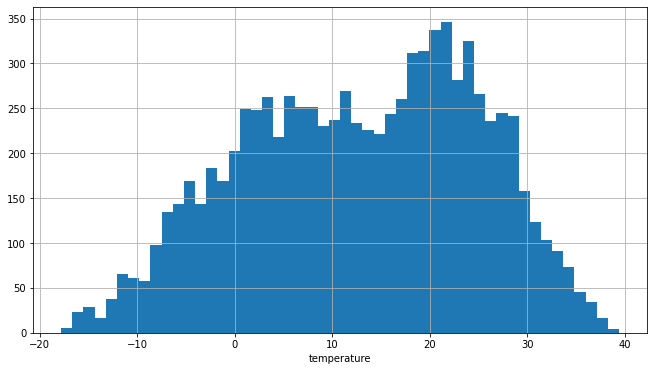

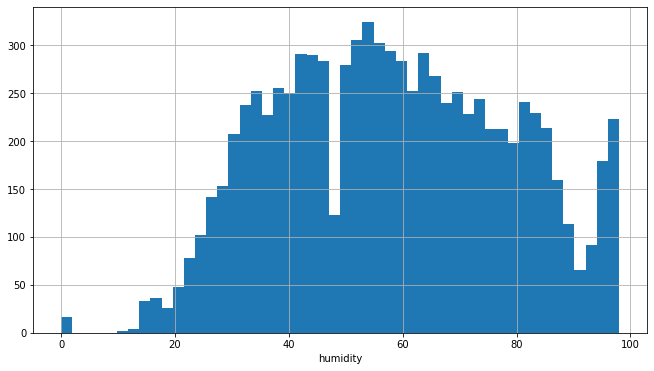

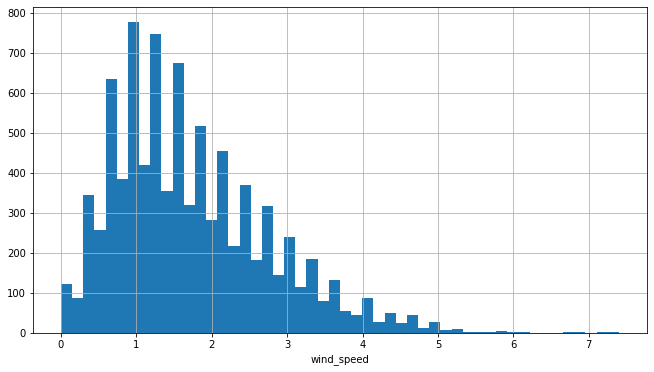

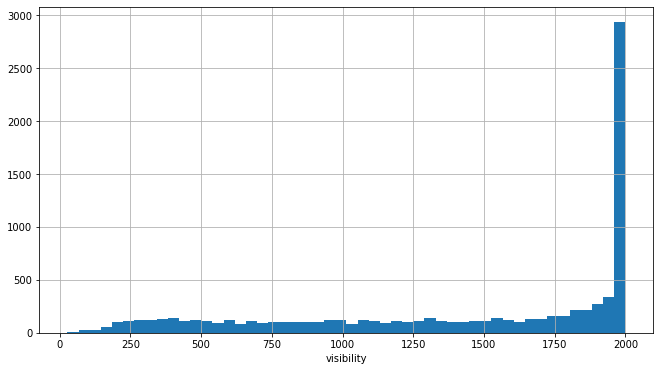

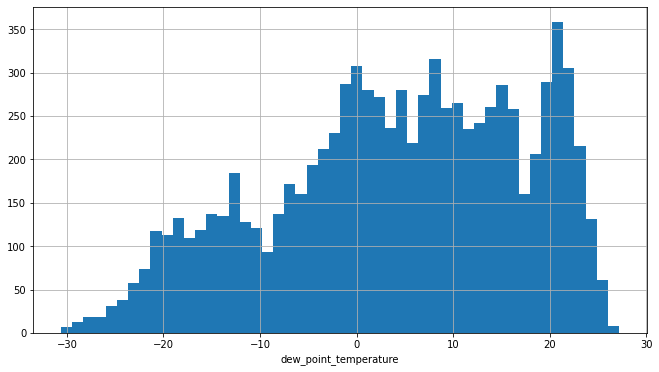

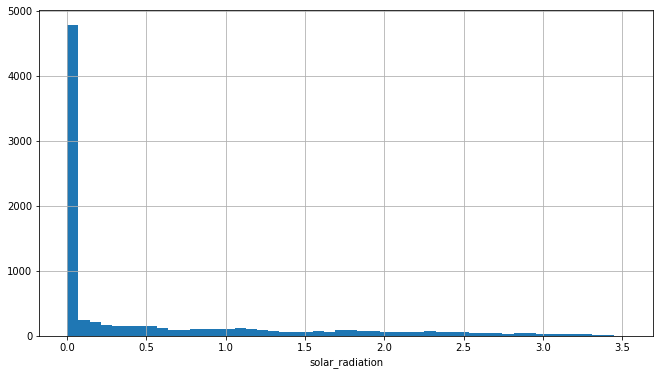

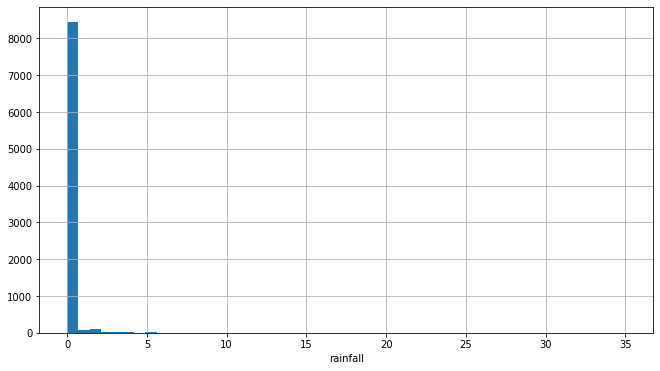

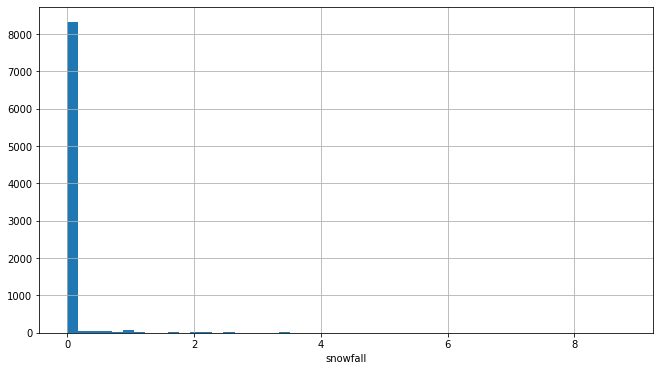

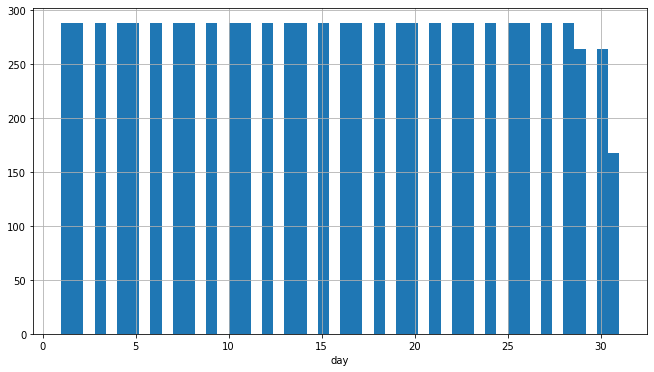

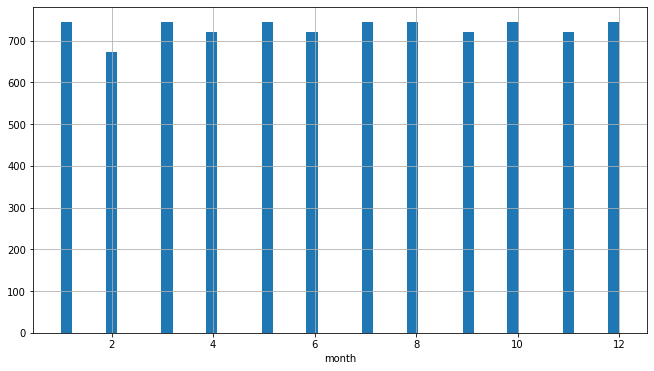

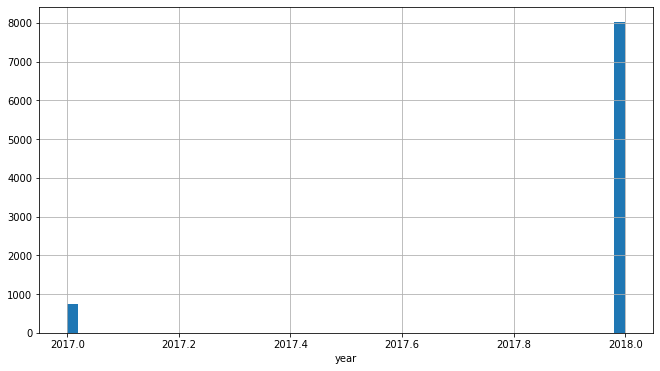

In [ ]:
# DISTRIBUTION OF FEATURES
for i in df.describe().columns:
  plt.figure(figsize = (11,6))
  df[i].hist(bins = 50)
  plt.xlabel(i)
  plt.show()

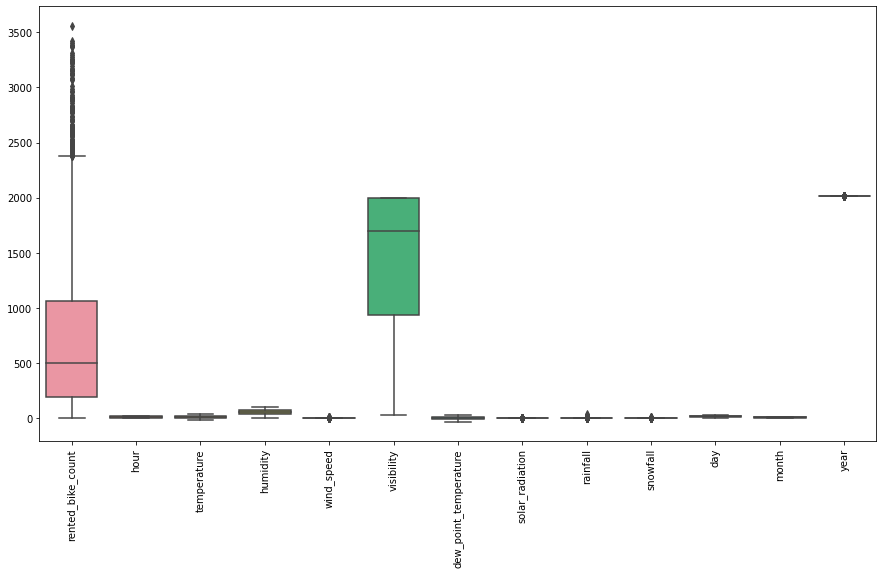

In [ ]:
# BOXPLOT ON DATASET FOR SEEING THE OUTLIERS
plt.figure(figsize=(15, 8))
sns.boxplot(data = df)
plt.xticks(rotation = "vertical")
plt.show()

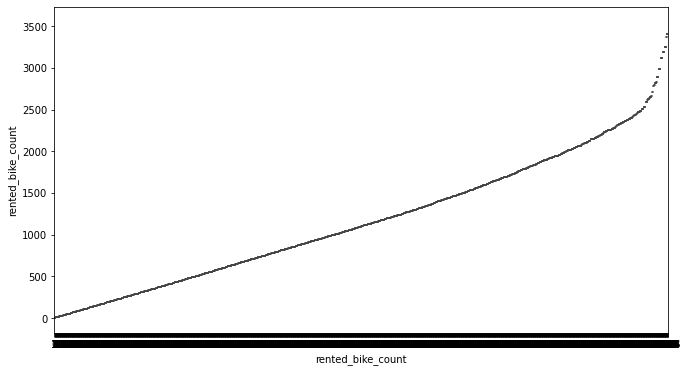

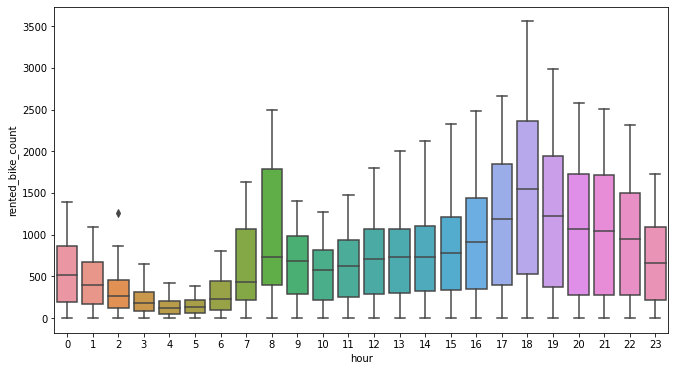

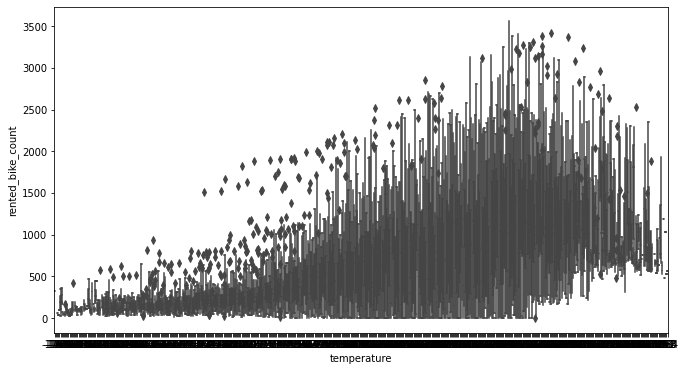

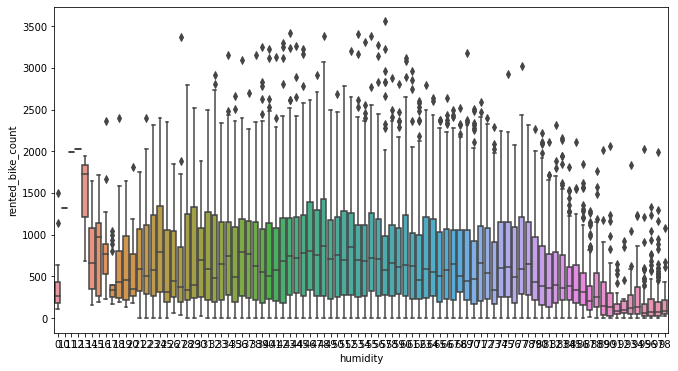

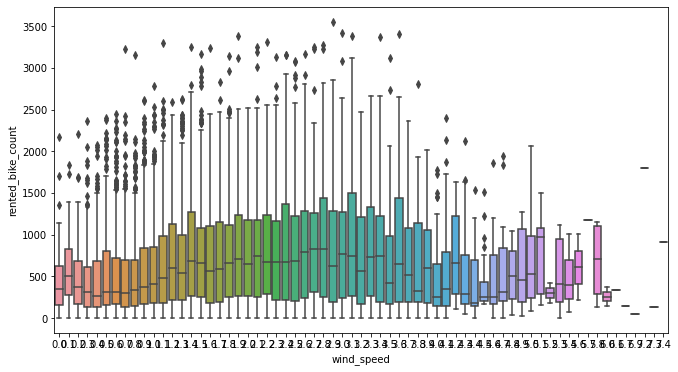

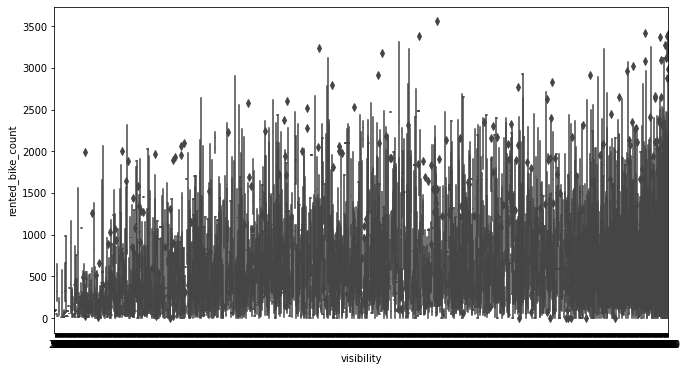

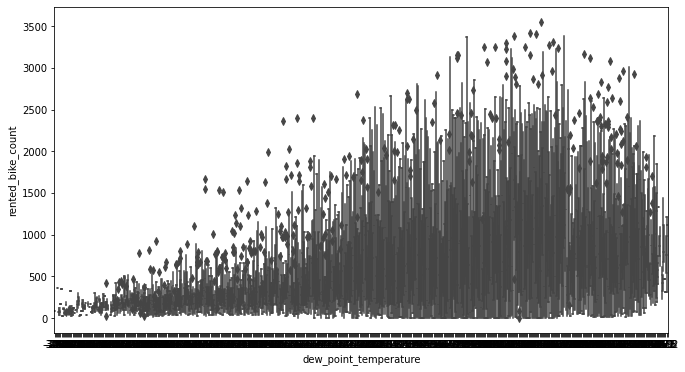

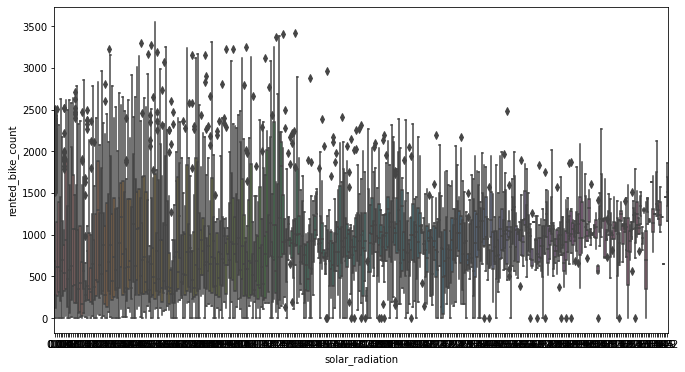

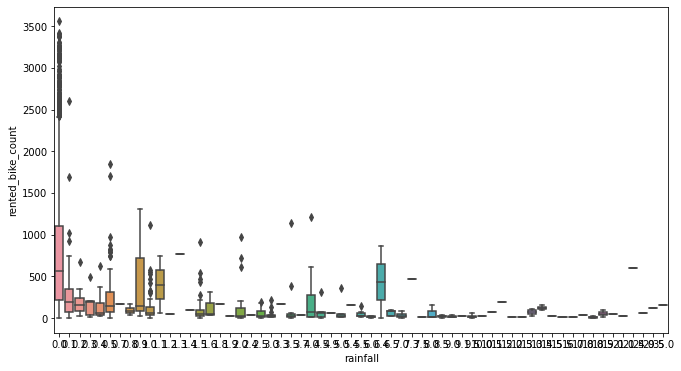

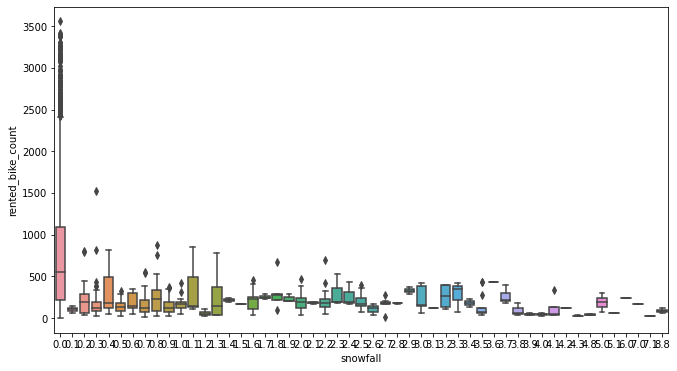

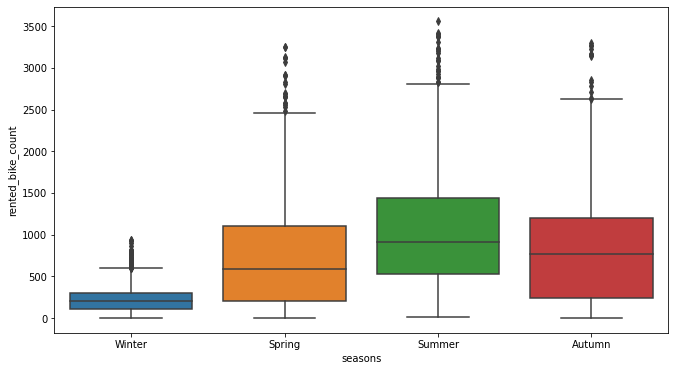

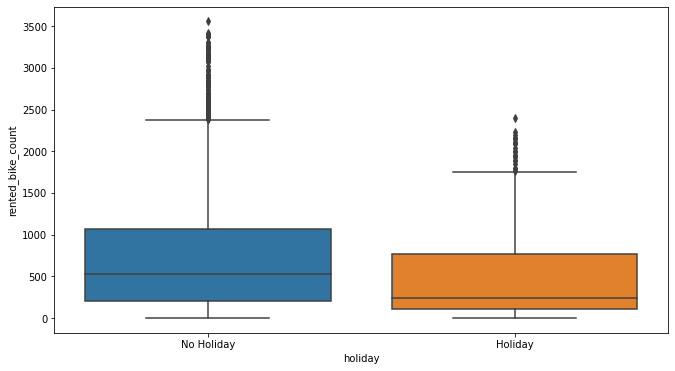

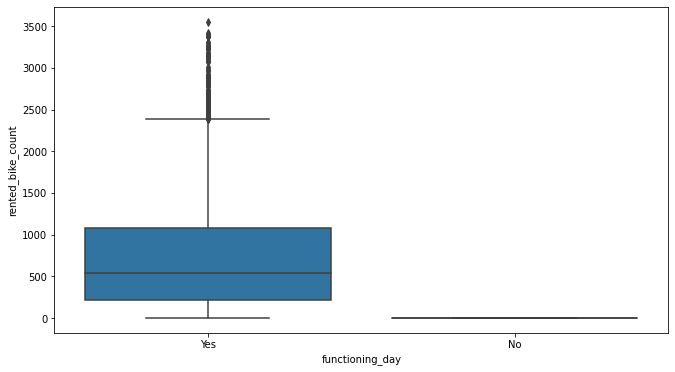

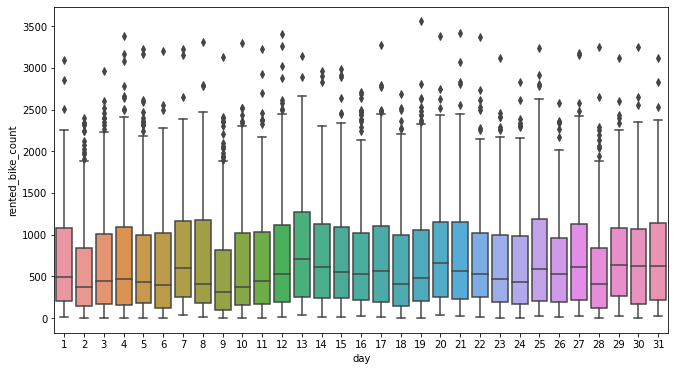

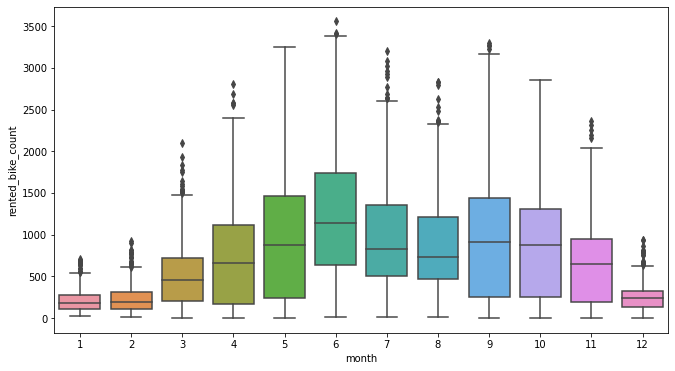

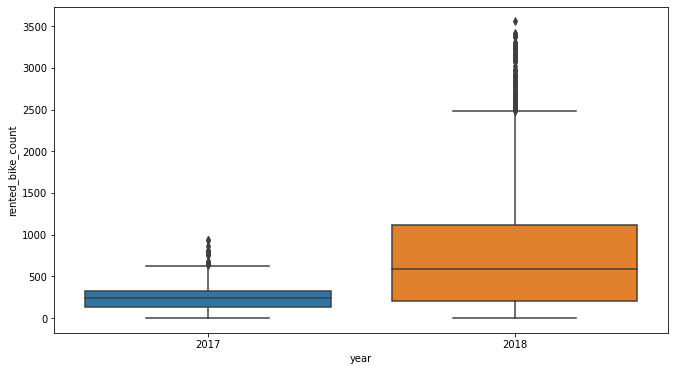

In [ ]:
# PLOTING BOXPLOT TOWARDS RENTED BIKE COUNT(TRAGET VARIABLE)
for i in df.columns[1:]:
  plt.figure(figsize = (11,6))
  sns.boxplot(data = df,y = "rented_bike_count",x = i)
  plt.show()

In [ ]:
df_cat.columns

Index(['seasons', 'holiday', 'functioning_day'], dtype='object')

In [ ]:
# MAKING DUMMIES OF CATEGORICAL COLUMNS
dummies = pd.get_dummies(df[['seasons', 'holiday','functioning_day']], drop_first=True)

In [ ]:
dummies

,seasons_Spring,seasons_Summer,seasons_Winter,holiday_No Holiday,functioning_day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [ ]:
# MERGING THE DUMMIES DATASET TO THE MAIN DATASET AS NEW_DF
new_df = pd.concat([df, dummies], axis =1)

In [ ]:
new_df.T

,0,1,2,3,4,5,6,7,8,9,...,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
rented_bike_count,254,204,173,107,78,100,181,460,930,490,...,761,768,837,1047,1384,1003,764,694,712,584
hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
temperature,-5.2,-5.5,-6.0,-6.2,-6.0,-6.4,-6.6,-7.4,-7.6,-6.5,...,7.8,7.0,7.2,6.0,4.7,4.2,3.4,2.6,2.1,1.9
humidity,37,38,39,40,36,37,35,38,37,27,...,20,20,23,29,34,34,37,39,41,43
wind_speed,2.2,0.8,1.0,0.9,2.3,1.5,1.3,0.9,1.1,0.5,...,2.2,3.3,1.5,2.1,1.9,2.6,2.3,0.3,1.0,1.3
visibility,2000,2000,2000,2000,2000,2000,2000,2000,2000,1928,...,2000,1994,1945,1877,1661,1894,2000,1968,1859,1909
dew_point_temperature,-17.6,-17.6,-17.7,-17.6,-18.6,-18.7,-19.5,-19.3,-19.8,-22.4,...,-13.8,-14.4,-12.6,-10.7,-9.8,-10.3,-9.9,-9.9,-9.8,-9.3
solar_radiation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.23,...,1.67,1.21,0.72,0.23,0.0,0.0,0.0,0.0,0.0,0.0
rainfall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
snowfall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_cat.columns

Index(['seasons', 'holiday', 'functioning_day'], dtype='object')

In [ ]:
# DROPING USELESS FEATURES FROM THE DATASET
new_df.drop(['dew_point_temperature', 'seasons', 'holiday', 'functioning_day'], axis=1, inplace=True)

In [ ]:
new_df.columns

Index(['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'day', 'month',
       'year', 'seasons_Spring', 'seasons_Summer', 'seasons_Winter',
       'holiday_No Holiday', 'functioning_day_Yes'],
      dtype='object')

In [ ]:
# RENAMING COLUMNS 
new_df.columns = ['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'day', 'month',
       'year', 'seasons_Spring', 'seasons_Summer', 'seasons_Winter',
       'holiday', 'function_day']

In [ ]:
# INDEPENDENT VARIBLES
X = new_df.iloc[:,1:]

In [ ]:
# DEPENDED VARIBLE(TRAGET VARIBLE)
Y = new_df["rented_bike_count"]

In [ ]:
# IMPORTING ML ALGORITHM FOR THE MODEL

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge


# SPLITTING THE X AND Y INTO X_TRAIN , X_TEST , Y_TRAIN , Y_TEST
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5)

LINEAR REGRESSION



In [ ]:
# TRAINING THE MODEl
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# INTERCEPT AND COFFIENT 
reg.intercept_ , reg.coef_

(1345705.617822332,
 array([ 2.70207808e+01,  2.68026164e+01, -8.68211625e+00,  2.08811341e+01,
         6.31780845e-03, -8.95325103e+01, -5.68074528e+01,  3.62253725e+01,
        -1.57130550e+00, -5.47507590e+01, -6.66695302e+02, -4.71220691e+02,
        -3.06028559e+02, -8.70699131e+02,  1.17113530e+02,  9.07156536e+02]))

In [ ]:
# PREDICTING X_TEST
y_pred=reg.predict(X_test)

In [ ]:
y_pred_train=reg.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

In [ ]:
r2_score(Y_test, y_pred)

0.5573770262170219

In [ ]:
reg.score(X_test, Y_test)

0.5573770262170219

In [ ]:
reg.score(X_train, Y_train)

0.5518544224178705

In [ ]:
y_pred

array([ 622.98901614,  560.76596504, 1356.88126185, ...,  118.92483647,
        241.61806077,  442.84273211])

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.554117952318942
MSE : 181118.6145432901
RMSE : 425.5803267813141


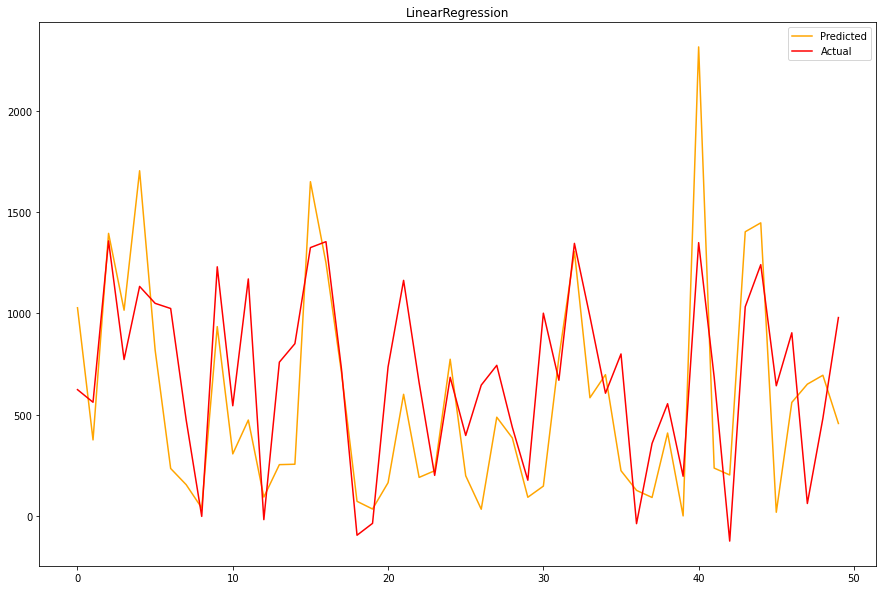

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:50]), color = "orange")
plt.plot(y_pred[:50], color = "red")
plt.title("LinearRegression")
plt.legend(["Predicted","Actual"])
plt.show()

LASSO REGRESSION

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
rf_grid = GridSearchCV(Lasso(),
                       param_grid = {"alpha" : [1.1,0.001]},
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ..........................................alpha=1.1; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.1s
[CV] END ........................................alpha=0.001; total time=   0.1s
[CV] END ........................................alpha=0.001; total time=   0.1s
[CV] END ........................................alpha=0.001; total time=   0.1s
[CV] END ........................................alpha=0.001; total time=   0.1s


GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [1.1, 0.001]},
             scoring='roc_auc', verbose=2)

In [ ]:
rf_grid.best_params_

{'alpha': 1.1}

In [ ]:
lasso = Lasso(alpha=1.1)
lasso.fit(X_train, Y_train)

Lasso(alpha=1.1)

In [ ]:
lasso.coef_

array([ 2.73304847e+01,  2.59275070e+01, -8.41645631e+00,  1.77838359e+01,
        1.01449087e-02, -8.15877296e+01, -5.72252304e+01,  2.70629336e+01,
       -1.33847758e+00,  1.20573844e+00, -5.07888443e+01, -1.12582700e+02,
       -1.06986163e+02, -3.68740392e+02,  8.88997620e+01,  8.58483975e+02])

In [ ]:
lasso.intercept_

102287.63487918161

In [ ]:
y_pred = lasso.predict(X_test)

In [ ]:
r2_score (Y_test, y_pred)

0.5589945870750749

In [ ]:
lasso.score(X_test, Y_test)

0.5589945870750749

In [ ]:
lasso.score(X_train, Y_train)

0.547331619947321

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.5557474234272153
MSE : 180456.71853042376
RMSE : 424.8019756668085


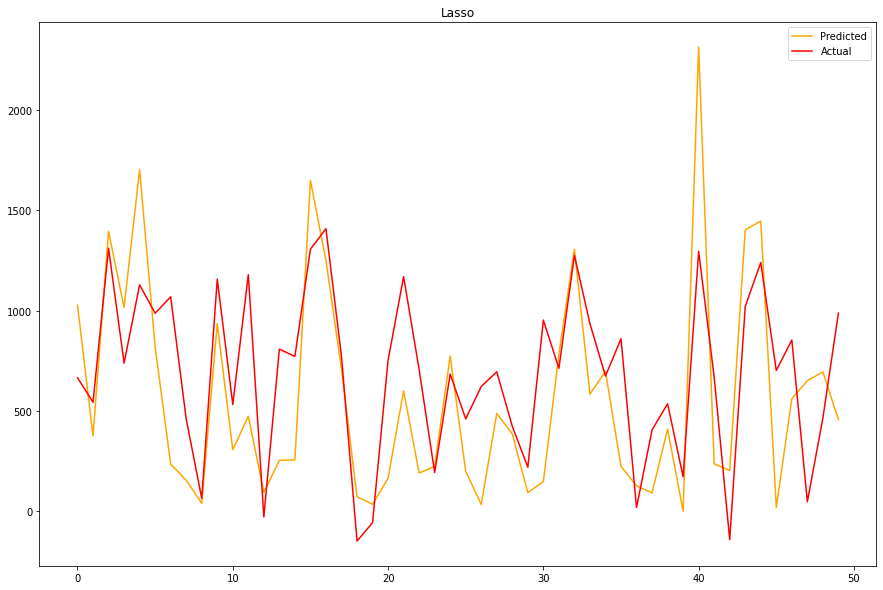

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:50]), color = "orange")
plt.plot(y_pred[:50], color = "red")
plt.title("Lasso")
plt.legend(["Predicted","Actual"])
plt.show()

RIDG REGRESSION

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_grid = GridSearchCV(Ridge(),
                       param_grid = {"alpha" : [0,0.0000000001]},
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s
[CV] END ........................................alpha=1e-10; total time=   0.0s


GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0, 1e-10]},
             scoring='roc_auc', verbose=2)

In [ ]:
rf_grid.best_params_

{'alpha': 0}

In [ ]:
ridge = Ridge(alpha=0)
ridge.fit(X_train,Y_train)

Ridge(alpha=0)

In [ ]:
y_pred = ridge.predict(X_test)

In [ ]:
ridge.coef_

array([ 2.70207808e+01,  2.68026164e+01, -8.68211625e+00,  2.08811341e+01,
        6.31780845e-03, -8.95325103e+01, -5.68074528e+01,  3.62253725e+01,
       -1.57130550e+00, -5.47507590e+01, -6.66695302e+02, -4.71220691e+02,
       -3.06028559e+02, -8.70699131e+02,  1.17113530e+02,  9.07156536e+02])

In [ ]:
ridge.intercept_

1345705.6178226885

In [ ]:
ridge.score(X_test, Y_test)

0.5573770262170249

In [ ]:
ridge.score(X_train, Y_train)

0.551854422417872

In [ ]:
r2_score(Y_test, y_pred )

0.5573770262170249

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.554117952318945
MSE : 181118.61454328892
RMSE : 425.5803267813127


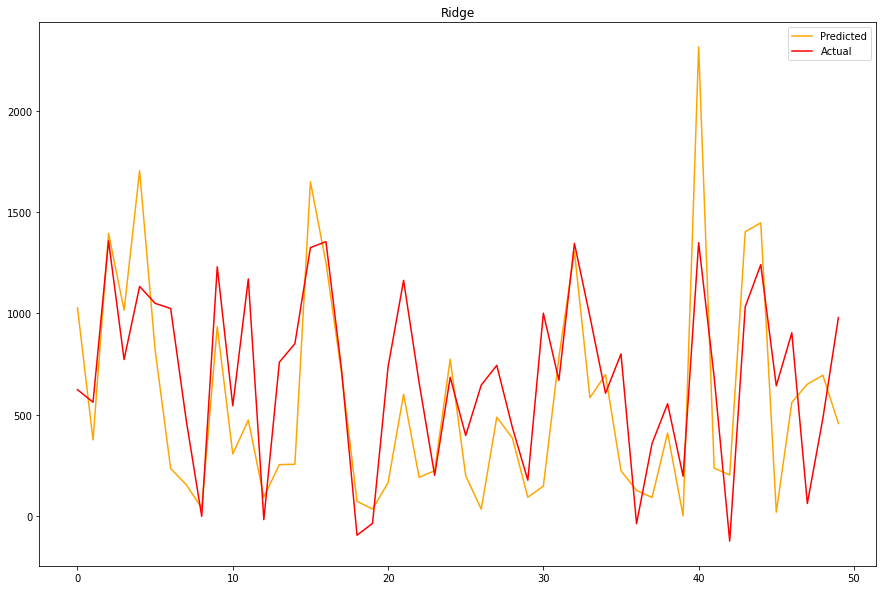

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:50]), color = "orange")
plt.plot(y_pred[:50], color = "red")
plt.title("Ridge")
plt.legend(["Predicted","Actual"])
plt.show()

ELASTIC NET

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
rf_grid = GridSearchCV(ElasticNet(),
                       param_grid = {"alpha" : [0,1] , 'l1_ratio' : [0.99, 0.999]},
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .............................alpha=0, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=0, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=0, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=0, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=0, l1_ratio=0.99; total time=   0.1s
[CV] END ............................alpha=0, l1_ratio=0.999; total time=   0.1s
[CV] END ............................alpha=0, l1_ratio=0.999; total time=   0.1s
[CV] END ............................alpha=0, l1_ratio=0.999; total time=   0.1s
[CV] END ............................alpha=0, l1_ratio=0.999; total time=   0.1s
[CV] END ............................alpha=0, l1_ratio=0.999; total time=   0.1s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0, 1], 'l1_ratio': [0.99, 0.999]},
             scoring='roc_auc', verbose=2)

In [ ]:
rf_grid.best_params_

{'alpha': 0, 'l1_ratio': 0.99}

In [ ]:
eln = ElasticNet(alpha= 0, l1_ratio= 0.99)

In [ ]:
eln.fit(X_train, Y_train)

ElasticNet(alpha=0, l1_ratio=0.99)

In [ ]:
y_pred = eln.predict(X_test)

In [ ]:
r2_score(Y_test, y_pred)

0.5573770262171962

In [ ]:
eln.score(X_test, Y_test)

0.5573770262171962

In [ ]:
eln.score(X_train, Y_train)

0.5518544224178756

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.5541179523191175
MSE : 181118.6145432188
RMSE : 425.5803267812303


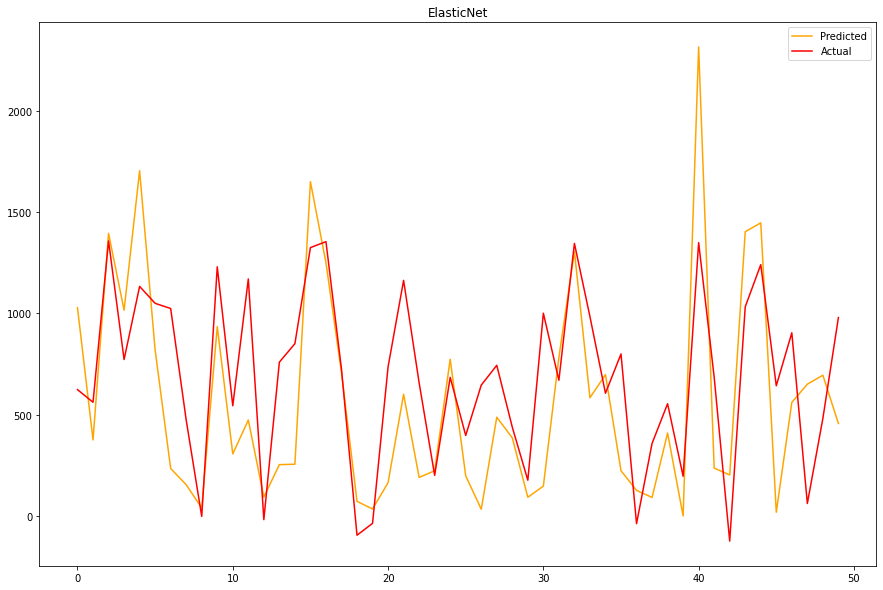

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:50]), color = "orange")
plt.plot(y_pred[:50], color = "red")
plt.title("ElasticNet")
plt.legend(["Predicted","Actual"])
plt.show()

DESION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
rf_grid = GridSearchCV(DecisionTreeRegressor(),
                       param_grid = {'max_depth' :[ i for i in range(8,11)], 'min_samples_split' :[ i for i in range(8,11)], 'min_samples_leaf': [i for i in range(6,11)]},
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=8; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=9; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END max_depth=8, min_samples_l

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [8, 9, 10],
                         'min_samples_leaf': [6, 7, 8, 9, 10],
                         'min_samples_split': [8, 9, 10]},
             scoring='roc_auc', verbose=2)

In [ ]:
rf_grid.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [8, 9, 10],
                         'min_samples_leaf': [6, 7, 8, 9, 10],
                         'min_samples_split': [8, 9, 10]},
             scoring='roc_auc', verbose=2)>

In [ ]:
rf_grid.best_params_

{'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 8}

In [ ]:
t = DecisionTreeRegressor(max_depth = 8, min_samples_split = 8, min_samples_leaf = 6)

In [ ]:
t.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=6, min_samples_split=8)

In [ ]:
y_pred = t.predict(X_test)

In [ ]:
r2_score(Y_test, y_pred)

0.802234540384112

In [ ]:
t.score(X_test, Y_test)

0.802234540384112

In [ ]:
t.score(X_train, Y_train)

0.8300829783880412

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.8007783750118828
MSE : 80924.41687789347
RMSE : 284.47217241391724


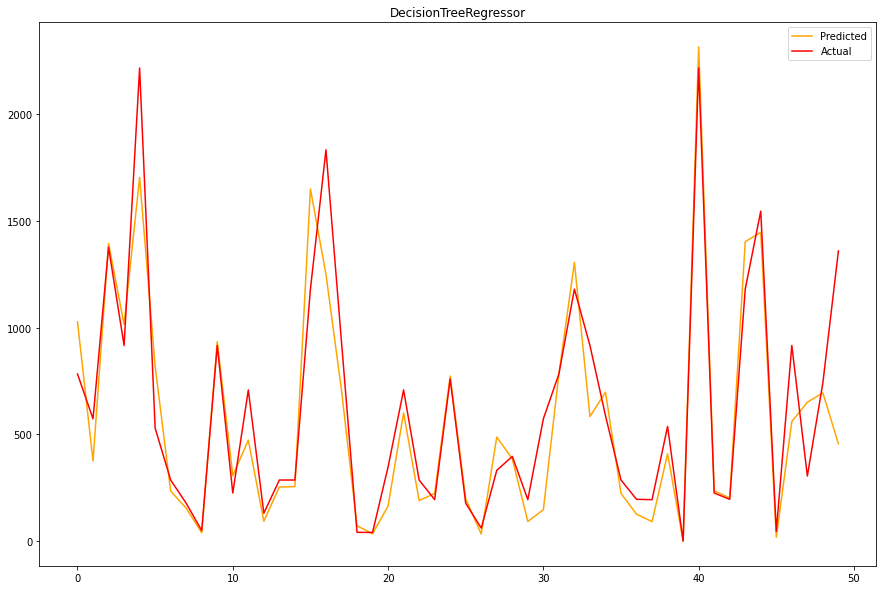

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:50]), color = "orange")
plt.plot(y_pred[:50], color = "red")
plt.title("DecisionTreeRegressor")
plt.legend(["Predicted","Actual"])
plt.show()

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_grid = GridSearchCV( RandomForestRegressor(),
                       param_grid = {'max_depth' : [18,19,20], 'min_samples_split' : [7,8,9], 'min_samples_leaf' : [7,6,8]},
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=7; total time=   1.7s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=7; total time=   1.7s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=7; total time=   1.7s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=7; total time=   1.7s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=7; total time=   1.6s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8; total time=   1.7s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8; total time=   1.6s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8; total time=   1.6s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8; total time=   1.6s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=8; total time=   1.7s
[CV] END max_depth=18, min_samples_leaf=7, min_samples_split=9; total time=   1.7s
[CV] END max_depth=18, mi

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [18, 19, 20],
                         'min_samples_leaf': [7, 6, 8],
                         'min_samples_split': [7, 8, 9]},
             scoring='roc_auc', verbose=2)

In [ ]:
rf_grid.best_params_

{'max_depth': 18, 'min_samples_leaf': 7, 'min_samples_split': 7}

In [ ]:
rfr = RandomForestRegressor(max_depth = 18, min_samples_split = 7, min_samples_leaf = 7)

In [ ]:
rfr.fit(X_train, Y_train)

RandomForestRegressor(max_depth=18, min_samples_leaf=7, min_samples_split=7)

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
rfr.score(X_train, Y_train)

0.9254478101550545

In [ ]:
rfr.score(X_test, Y_test)

0.8726294564797473

In [ ]:
r2_score(Y_test , y_pred)

0.8726294564797473

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.871691615386179
MSE : 52119.24762704484
RMSE : 228.29640300943166


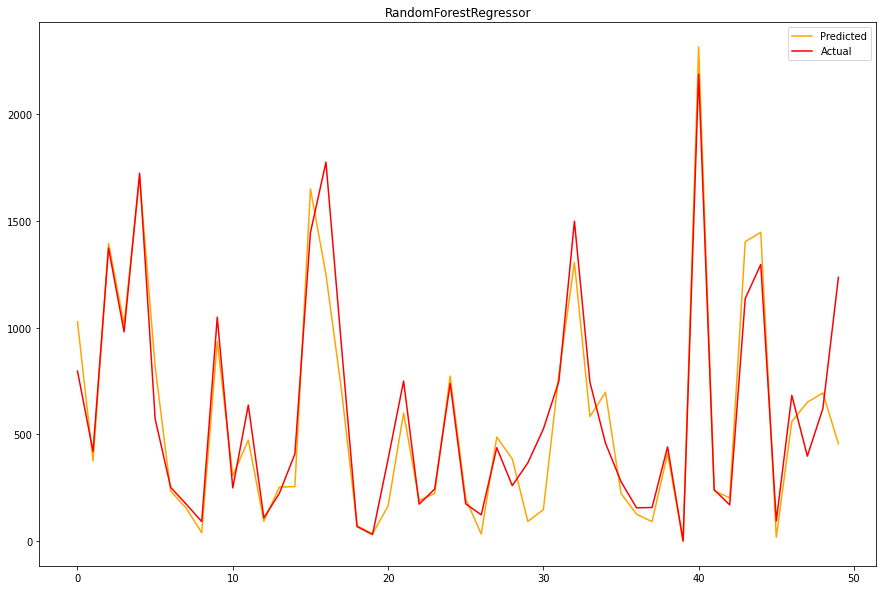

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:50]), color = "orange")
plt.plot(y_pred[:50], color = "red")
plt.title("RandomForestRegressor")
plt.legend(["Predicted","Actual"])
plt.show()

ADA BOOSTIKNG

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
rf_grid = GridSearchCV( AdaBoostRegressor(),
                       param_grid = { 'n_estimators' :[50, 60], 'learning_rate' : [1.0,0.75], 'loss' :['linear', 'square' , 'exponential'], "random_state" : [0,1,2]}, cv=3
                       , verbose=2, scoring='roc_auc')


In [ ]:
rf_grid.fit(X_train,Y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=0; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=0; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=0; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=1; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=1; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=1; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=2; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=2; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=50, random_state=2; total time=   0.4s
[CV] END learning_rate=1.0, loss=linear, n_estimators=60, random_state=0; total time=   0.4s
[CV] END

GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [1.0, 0.75],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 60], 'random_state': [0, 1, 2]},
             scoring='roc_auc', verbose=2)

In [ ]:
rf_grid.best_params_

{'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': 0}

In [ ]:
rf_grid.best_score_

nan

In [ ]:
adr = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, loss='linear', random_state= 0)

In [ ]:
adr.fit(X_train, Y_train)

AdaBoostRegressor(learning_rate=0.1, random_state=0)

In [ ]:
y_pred = adr.predict(X_test)

In [ ]:
adr.score(X_train, Y_train)

0.6474924743563113

In [ ]:
adr.score(X_test, Y_test)

0.6375309010523563

In [ ]:
r2_score(Y_test, y_pred)

0.6375309010523563

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.6348620075488303
MSE : 148320.13904533724
RMSE : 385.12353738162676


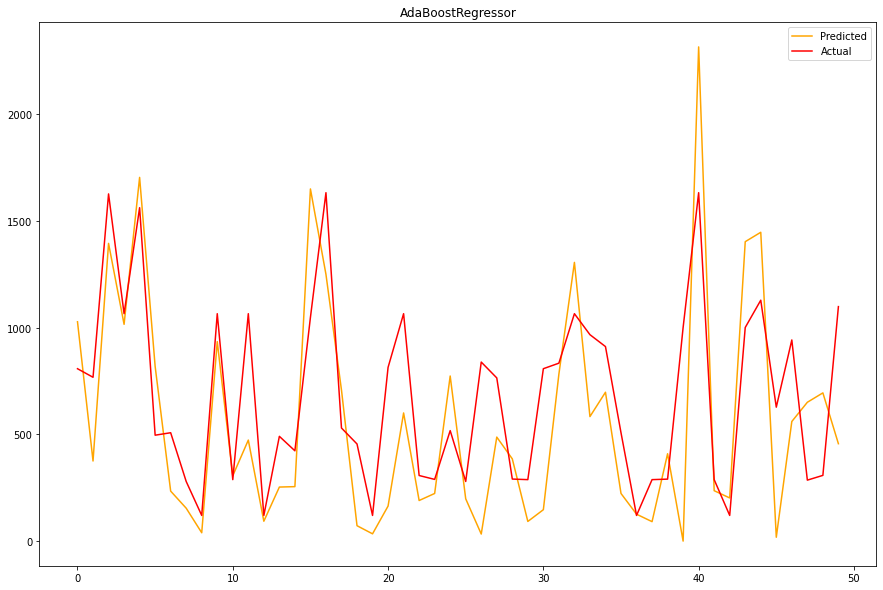

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:50]), color = "orange")
plt.plot(y_pred[:50], color = "red")
plt.title("AdaBoostRegressor")
plt.legend(["Predicted","Actual"])
plt.show()

GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
rf_grid = GridSearchCV( GradientBoostingRegressor(),
                       param_grid ={
    "learning_rate": [0.001],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_depth":[3],
    "max_features":["auto"],
    "criterion": ["friedman_mse"],
    "n_estimators":[50]
    }, cv=5
                       , verbose=2, scoring='roc_auc')
rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=friedman_mse, learning_rate=0.001, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END criterion=friedman_mse, learning_rate=0.001, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END criterion=friedman_mse, learning_rate=0.001, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END criterion=friedman_mse, learning_rate=0.001, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END criterion=friedman_mse, learning_rate=0.001, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.001], 'max_depth': [3],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [50]},
             scoring='roc_auc', verbose=2)

In [ ]:
rf_grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.001,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
gbr = GradientBoostingRegressor(criterion = 'friedman_mse',
  learning_rate = 0.1,
  max_depth = 25,
  max_features = 'auto',
  min_samples_leaf = 20,
  min_samples_split = 10,
  n_estimators = 50)

In [ ]:
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=25, max_features='auto',
                          min_samples_leaf=20, min_samples_split=10,
                          n_estimators=50)

In [ ]:
y_pred = gbr.predict(X_test)

In [ ]:
r2_score(Y_test, y_pred)

0.8923478420709737

In [ ]:
gbr.score(X_train, Y_train)

0.9681249499566261

In [ ]:
gbr.score(X_test, Y_test)

0.8923478420709737

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.8915551892744416
MSE : 44050.60480719795
RMSE : 209.88235944737698


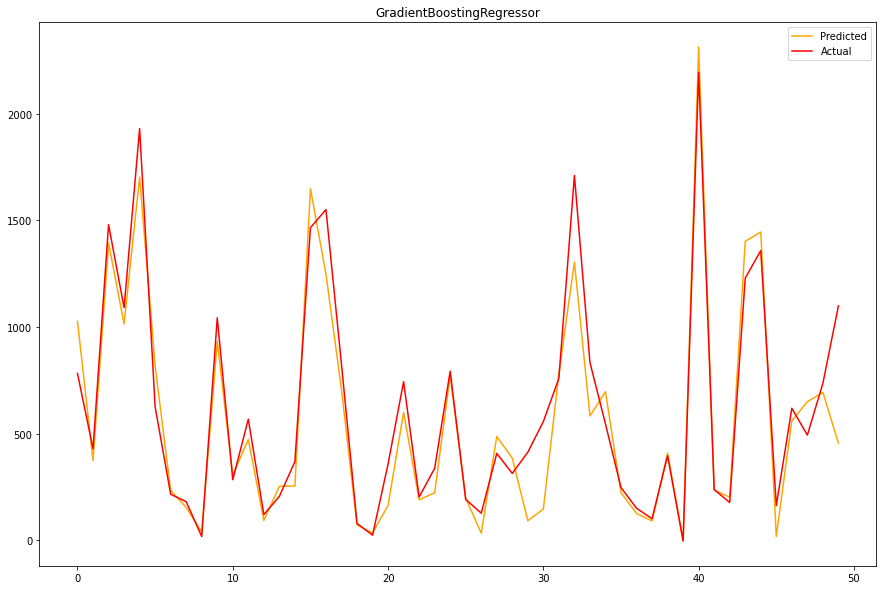

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:50]), color = "orange")
plt.plot(y_pred[:50], color = "red")
plt.title("GradientBoostingRegressor")
plt.legend(["Predicted","Actual"])
plt.show()

XGB

In [ ]:
from xgboost import XGBRegressor

In [ ]:
rf_grid = GridSearchCV(XGBRegressor(),
                       param_grid = {"min_child_weight":[10,20], 
            'eta': [0.004,0.1, 0.11, 0.01], 
            'colsample_bytree':[0.7, 0.1], 
            'max_depth': [15,17, 20],
          
          }, cv=5 , verbose=2)
rf_grid.fit(X_train,Y_train)

In [ ]:
rf_grid.best_params_

{'colsample_bytree': 0.7,
 'eta': 0.004,
 'max_depth': 15,
 'min_child_weight': 10}

In [ ]:
xbr = XGBRegressor(
    n_estimators = 100,
    gamma = 2,
 learning_rate = 0.1,
  max_depth = 25,
  min_child_weight = 15)

In [ ]:
xbr.fit(X_train, Y_train)

[11:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(gamma=2, max_depth=25, min_child_weight=15)

In [ ]:

y_pred = xbr.predict(X_test)

In [ ]:

r2_score(Y_test, y_pred)

0.8911388821556678

In [ ]:
xbr.score(X_train, Y_train)

0.9922961344170859

In [ ]:
xbr.score(X_test, Y_test)

0.8911388821556678

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

Adjusted R2 :  0.8903373276754518
MSE : 44545.30381260008
RMSE : 211.05758411533114


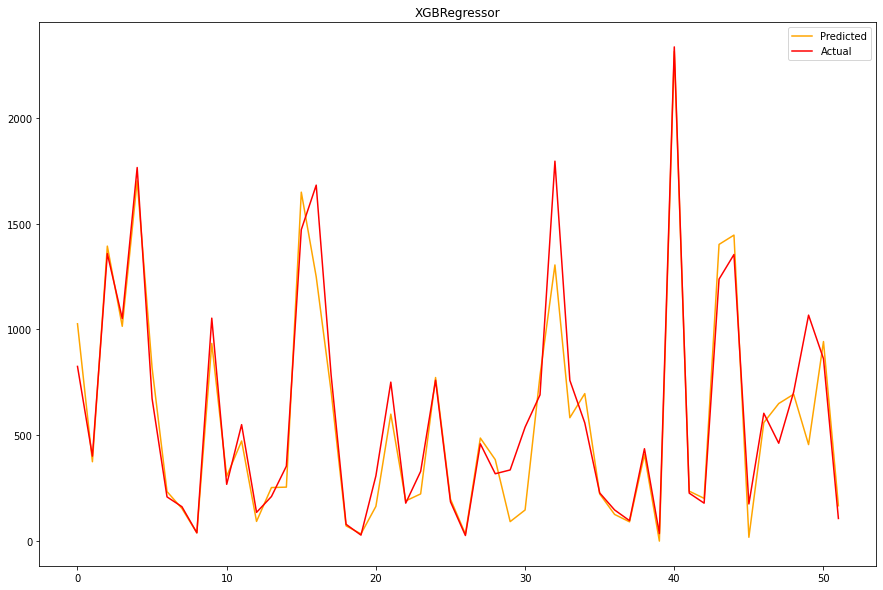

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_test[:52]), color = "orange")
plt.plot(y_pred[:52], color = "red")
plt.title("XGBRegressor")
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
X.iloc[655:669,:]

,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,day,month,year,seasons_Spring,seasons_Summer,seasons_Winter,holiday,function_day
655,7,-5.0,31,0.5,2000,0.00,0.0,0.0,28,12,2017,0,0,1,1,1
656,8,-4.7,30,0.6,2000,0.00,0.0,0.0,28,12,2017,0,0,1,1,1
657,9,-4.3,38,0.7,1877,0.04,0.0,0.0,28,12,2017,0,0,1,1,1
658,10,-3.4,33,1.3,1863,0.33,0.0,0.0,28,12,2017,0,0,1,1,1
659,11,-2.1,34,1.0,1868,0.65,0.0,0.0,28,12,2017,0,0,1,1,1
660,12,-0.8,38,1.0,1686,0.75,0.0,0.0,28,12,2017,0,0,1,1,1
661,13,0.8,46,1.4,1598,0.80,0.0,0.0,28,12,2017,0,0,1,1,1
662,14,0.8,55,1.8,1132,0.59,0.0,0.0,28,12,2017,0,0,1,1,1
663,15,0.4,57,2.4,1179,0.36,0.0,0.0,28,12,2017,0,0,1,1,1
664,16,0.3,57,2.3,1204,0.19,0.0,0.0,28,12,2017,0,0,1,1,1


In [ ]:
new_df.iloc[655:669,0]

655    257
656    554
657    326
658    225
659    288
660    286
661    301
662    311
663    303
664    390
665    407
666    552
667    402
668    319
Name: rented_bike_count, dtype: int64

In [ ]:
y_pred = adr.predict(X.iloc[655:669,:])

In [ ]:
y_pred

array([239.71748879, 287.04976672, 290.13969732, 290.13969732,
       290.13969732, 290.13969732, 290.13969732, 290.13969732,
       290.13969732, 290.13969732, 290.13969732, 288.9122807 ,
       288.9122807 , 288.9122807 ])